<a href="https://colab.research.google.com/github/NIP-Data-Computation/show-and-tell/blob/master/geneb_show_and_tell_week3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Week 3 DataCamp Show and Tell**

**Author:** 

Gene Carlo F. Belinario 

III BS Applied Physics - Instrumentation Physics

**Topics:** 
*   Introduction to Data Visualization with Seaborn
*   Introduction to Importing Data in Python
*   Intermediate Importing Data in Python

**General Objective:** Demonstrate importing of data in Python and perform basic data visualization using Seaborn

**Specific Objectives:**
*   Import Customs data and visualize VAT paid on BOC transactions from 2016 to 2019 using Seaborn library
*   Import an HDF5 file of one gravitational wave observation from LIGO website and visualize


# **Application on the PHL Customs Dataset**

**Task:** Compare and track the monthly VAT paid on transactions in BOC in the period 2016 - 2019. 

In [ ]:
# Import necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Mount drive
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
# Check if mounting is successful, intended files must appear in the output
!ls drive/My\ Drive/NIP-Data-Computation-Group-Drive/Datasets/PHL\ Customs\ Open\ Data/clean/csv

boc_lite_2012_2019_top9_hscode.csv  boc_lite_2015.csv  boc_lite_2019.csv
boc_lite_2012.csv		    boc_lite_2016.csv  gapminder.csv
boc_lite_2013.csv		    boc_lite_2017.csv
boc_lite_2014.csv		    boc_lite_2018.csv


In [ ]:
# Import datasets from 2016, 2017, 2018, and 2019
# The file name was not recognized, so I manually put the filepath as the argument
data_2016 = pd.read_csv('/content/drive/My Drive/NIP-Data-Computation-Group-Drive/Datasets/PHL Customs Open Data/clean/csv/boc_lite_2016.csv', encoding = "ISO-8859-1")
data_2017 = pd.read_csv('/content/drive/My Drive/NIP-Data-Computation-Group-Drive/Datasets/PHL Customs Open Data/clean/csv/boc_lite_2017.csv', encoding = "ISO-8859-1")
data_2018 = pd.read_csv('/content/drive/My Drive/NIP-Data-Computation-Group-Drive/Datasets/PHL Customs Open Data/clean/csv/boc_lite_2018.csv', encoding = "ISO-8859-1")
data_2019 = pd.read_csv('/content/drive/My Drive/NIP-Data-Computation-Group-Drive/Datasets/PHL Customs Open Data/clean/csv/boc_lite_2019.csv', encoding = "ISO-8859-1")


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,25,28,29) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
# Monthly total VAT paid on transaction 
Year2016 = data_2016.groupby('tm')[['vatpaid']].sum()
Year2017 = data_2017.groupby('tm')[['vatpaid']].sum()
Year2018 = data_2018.groupby('tm')[['vatpaid']].sum()
Year2019 = data_2019.groupby('tm')[['vatpaid']].sum()

# Change indexes for each year
index2016 = []
for index in Year2016.index.str.replace('2016m',''):
  index2016.append(int(index))
Year2016['month'] = index2016

index2017 = []
for index in Year2017.index.str.replace('2017m',''):
  index2017.append(int(index))
Year2017['month'] = index2017

index2018 = []
for index in Year2018.index.str.replace('2018m',''):
  index2018.append(int(index))
Year2018['month'] = index2018

index2019 = []
for index in Year2019.index.str.replace('2019m',''):
  index2019.append(int(index))
Year2019['month'] = index2019

print(Year2016)

             vatpaid  month
tm                         
2016m1   23752877289      1
2016m10  29690619111     10
2016m11  29893016562     11
2016m12  29256175375     12
2016m2   24755421374      2
2016m3   28825952401      3
2016m4   24647591502      4
2016m5   26816265605      5
2016m6   27915112476      6
2016m7   24366055533      7
2016m8   28763919122      8
2016m9   28715621464      9


In [ ]:
# Sort the new indexes
Year2016_sorted = pd.DataFrame(Year2016.reset_index(drop=True).set_index('month').sort_index().reset_index())
Year2017_sorted = pd.DataFrame(Year2017.reset_index(drop=True).set_index('month').sort_index().reset_index())
Year2018_sorted = pd.DataFrame(Year2018.reset_index(drop=True).set_index('month').sort_index().reset_index())
Year2019_sorted = pd.DataFrame(Year2019.reset_index(drop=True).set_index('month').sort_index().reset_index())

print(Year2019_sorted)

    month       vatpaid
0       1   60595824731
1       2   52399060159
2       3   88247117135
3       4   60101543903
4       5  603015851443
5       6   55174414726
6       7   61719140460
7       8   58777246629
8       9   57966898447
9      10   62377795924
10     11   57510041771
11     12   52775908137


In [ ]:
# Merge the DataFrames chronologically based on year
Period1619 = Year2016_sorted.append(Year2017_sorted).append(Year2018_sorted).append(Year2019_sorted)
Period1619Alt = pd.DataFrame(Period1619.reset_index(drop=True).set_index('month').reset_index())

print(Period1619.head())
print(Period1619Alt)

   month      vatpaid
0      1  23752877289
1      2  24755421374
2      3  28825952401
3      4  24647591502
4      5  26816265605
    month       vatpaid
0       1   23752877289
1       2   24755421374
2       3   28825952401
3       4   24647591502
4       5   26816265605
5       6   27915112476
6       7   24366055533
7       8   28763919122
8       9   28715621464
9      10   29690619111
10     11   29893016562
11     12   29256175375
12      1   31974065163
13      2   27898262819
14      3   33507989031
15      4   27559405257
16      5   33480157106
17      6   29852414910
18      7   31451023897
19      8   34120719360
20      9   49161994648
21     10   54656503632
22     11   59084307504
23     12   58744223048
24      1   54588727442
25      2   53050132422
26      3   54801245864
27      4   57143651967
28      5   63283162836
29      6   60187787391
30      7   64725137856
31      8   65650098792
32      9   62039162974
33     10   70850252737
34     11   64382429548
35  

In [ ]:
# Add a new column for identifying the year and months

year1 = ['2016']*12
year2 = ['2017']*12
year3 = ['2018']*12
year4 = ['2019']*12

year = year1 + year2 + year3 + year4

Period1619Alt['year'] = year
print(Period1619Alt)

    month       vatpaid  year
0       1   23752877289  2016
1       2   24755421374  2016
2       3   28825952401  2016
3       4   24647591502  2016
4       5   26816265605  2016
5       6   27915112476  2016
6       7   24366055533  2016
7       8   28763919122  2016
8       9   28715621464  2016
9      10   29690619111  2016
10     11   29893016562  2016
11     12   29256175375  2016
12      1   31974065163  2017
13      2   27898262819  2017
14      3   33507989031  2017
15      4   27559405257  2017
16      5   33480157106  2017
17      6   29852414910  2017
18      7   31451023897  2017
19      8   34120719360  2017
20      9   49161994648  2017
21     10   54656503632  2017
22     11   59084307504  2017
23     12   58744223048  2017
24      1   54588727442  2018
25      2   53050132422  2018
26      3   54801245864  2018
27      4   57143651967  2018
28      5   63283162836  2018
29      6   60187787391  2018
30      7   64725137856  2018
31      8   65650098792  2018
32      9 

In [1]:
# Create a line plot showing a comparison of monthly VAT collections from 2016 - 2019 using Seaborn library
sns.set_style('darkgrid')
sns.set_context('notebook')

lp = sns.relplot('month', 'vatpaid', data=Period1619Alt, kind='line', col='year', marker='o', color='green')

lp.fig.suptitle('Monthly VAT paid on BOC transactions from 2016 to 2019', y=1.03)
x_label = ["", "February", "April", "June", "August", "October", "December"]
lp.set_xticklabels(x_label, rotation=90)
lp.set(ylabel='VAT Paid in PHP (hundred billion)', xlabel='Month')

#Try later log scale 

plt.show()

NameError: ignored

# **Visualize a segment of a detected gravitational wave**

**Task:** Import an HDF5 file from the LIGO website and visualize a segment of a gravitational wave using Seaborn library

In [ ]:
# Import the necessary modules
import matplotlib.pyplot as plt
import h5py
import requests

In [ ]:
# Import the HDF5 file of 815411200 timeline of the S1 dataset from the H1 detector located at the LIGO website

url = 'https://www.gw-openscience.org/archive/data/S5/814743552/H-H1_LOSC_4_V1-815411200-4096.hdf5'
r = requests.get(url, allow_redirects = True)

# Check if the file is imported in the current working directory
open('H-H1_LOSC_4_V1-815411200-4096.hdf5', 'wb').write(r.content)

95071329

In [ ]:
# Inspect the imported HDF5 file
file = 'H-H1_LOSC_4_V1-815411200-4096.hdf5'
data = h5py.File(file, 'r')

print(type(data))
for key in data.keys():
  print(key)

<class 'h5py._hl.files.File'>
meta
quality
strain


In [ ]:
# Get the HDF5 group
group = data['strain']

# Check the keys of group
for key in group.keys():
  print(key)

# Set a variable equal to time series data
strain = data['strain']['Strain'].value

# Set number of time points to sample 
num_samples = 10000

# Set the time vector
time = np.arange(0, 1, 1/num_samples)


Strain


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  if __name__ == '__main__':


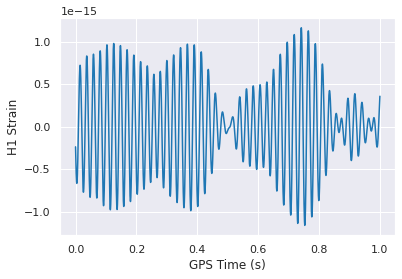

In [ ]:
# It's plotting time!

GravWave = sns.lineplot(time, strain[:num_samples])
GravWave.set(ylabel='H1 Strain', xlabel='GPS Time (s)')
plt.show()